# The Factors behind The Price of Housing in King County
### Wenkai Fu - 1005787347
### Feb 6th, 2022

## Introduction
As a university student who has not yet entered the workforce, it is important to understand what factors can influence the price of a house. It is due to the price of the house directly contributing to the level of stress we will face in life. So this analysis is designed to __help people choose a more cost-effective home while meeting their needs__. Thus, the research question of the analysis is that __what are some factors that greatly correlate with the price of housing__.

The dataset that supports the analysis is *House Sales in King County, USA*, which is published by Harlfoxem in 2017. The dataset records the house sale prices and several house indicators for King County between May 2014 and May 2015. The outcome is **the price of the house**, which is a numerical variable, and the price is in US dollars. Furthermore, the explanatory variables are the **number of bedrooms**, **the number of bathrooms** and **the living area of the house**. The reason why I choose these indicators is that these indicators are the most basic and relevant to life. Moreover, controlling the number of important indicators and filtering unimportant variables can reduce the variance of the prediction. Note that these independent variables are all numerical. The 0.5 for the number of bathrooms means a room with a toilet but no shower. 

Last but not the least, I hypothesize that the __living area__ of the house has a strong positive relationship with the __price__ of the house.
<div style="page-break-after: always;"></div>

In [1]:
# Import packages
import pandas as pd
import numpy as np
import qeds
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import data
df = pd.read_csv(r'/Users/fuwenkai/Documents/U of T/ECO225/ECO225 Project/Data/kc_house_data.csv')
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


## Summary Statistics
### Data Cleaning
After importing the dataset from the Kaggle website, it is important to clean the dataset. Since the response variable and the explanatory variables are already selected previously. It is helpful to clean the dataset by selecting the practical variables from the raw dataset. After that, removing invalid observations is also critical. It makes the analysis more precise and reliable. According to common sense, the number of bedrooms, bathrooms and the living area should not be 0. Therefore, we need to remove these unconventional observations.

In [3]:
# Cleaning process
useful_col = ['price',
             'bedrooms',
             'bathrooms',
             'sqft_living']
df_clean = df[useful_col] # Select useful columns
print(f"Bedrooms contains unconventional observations: {0 in pd.unique(df_clean['bedrooms'])}")
print(f"Bathrooms contains unconventional observations: {0 in pd.unique(df_clean['bathrooms'])}")
print(f"Living area contains unconventional observations: {0 in pd.unique(df_clean['sqft_living'])}")
df_clean = df_clean.drop(df_clean[df_clean.bedrooms == 0].index)
df_clean = df_clean.drop(df_clean[df_clean.bathrooms == 0].index)
print(f"Bedrooms contains unconventional observations: {0 in pd.unique(df_clean['bedrooms'])}")
print(f"Bathrooms contains unconventional observations: {0 in pd.unique(df_clean['bathrooms'])}")
df_clean = df_clean.dropna().reset_index()
df_clean

Bedrooms contains unconventional observations: True
Bathrooms contains unconventional observations: True
Living area contains unconventional observations: False
Bedrooms contains unconventional observations: False
Bathrooms contains unconventional observations: False


,index,price,bedrooms,bathrooms,sqft_living
0,0,221900.0,3,1.00,1180
1,1,538000.0,3,2.25,2570
2,2,180000.0,2,1.00,770
3,3,604000.0,4,3.00,1960
4,4,510000.0,3,2.00,1680
...,...,...,...,...,...
21592,21608,360000.0,3,2.50,1530
21593,21609,400000.0,4,2.50,2310
21594,21610,402101.0,2,0.75,1020
21595,21611,400000.0,3,2.50,1600


The table above shows the cleaned dataset after the cleaning processes that are presented previously. The cleaned dataset has four variables, one response variable(Price) and three explanatory variables(The number of bedrooms, bathrooms and the living area). Besides, compared with the raw dataset that owns 21613 observations, the cleaned dataset now contains 21597 observations, 16 invalid observations are removed.

### Statistics Summary

In [4]:
# Summary statistics for the outcome(Y)
df_clean["price"].describe()

count    2.159700e+04
mean     5.402029e+05
std      3.671337e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

For housing prices, the statistical summary is described above. As you can see, the difference between prices is significant, with the most expensive prices of $7.7*10^6$, which is more than 14 times the average housing price. The standard deviation of prices is about $3.67 * 10^5$, which is large and means that the distribution of housing prices is very dispersed.

In [5]:
# Summary statistics for the explantory variables(X)
df_clean[["bedrooms", "bathrooms", "sqft_living"]].describe()

,bedrooms,bathrooms,sqft_living
count,21597.000000,21597.000000,21597.000000
mean,3.373200,2.115826,2080.321850
std,0.926299,0.768984,918.106125
min,1.000000,0.500000,370.000000
25%,3.000000,1.750000,1430.000000
50%,3.000000,2.250000,1910.000000
75%,4.000000,2.500000,2550.000000
max,33.000000,8.000000,13540.000000


This table contains the statistics of three explanatory variables. On average, the number of bedrooms of houses is about 3.37, the number of bathrooms is 2.12 approximately, and the living area of houses is about 2080.32 sqft. What can be observed is that the differences between the data are very large and include outliers. For instance, the maximum value of the number of bedrooms is 33, which is nearly ten times the average. Furthermore, the distribution of the number of bedrooms witnesses a right-skewed pattern since the median(50% quantile = 3) is less than the mean(3.37) value. Similarly, the distribution of living area has a right-skewed patten as well, because the median(1910 sqft) is less than the mean value(2080.32 sqft). Conversely, the median(2.25) of the number of bathrooms is similar to the mean(2.12), so the distribution is likely to be symmetric.

In [6]:
df_clean.dtypes

index            int64
price          float64
bedrooms         int64
bathrooms      float64
sqft_living      int64
dtype: object

By looking at the type of variables, we can determine a suitable graphical summary of the corresponding variable. For float(continuous numerical variable), the histogram is very useful. For integer(discrete numerical variable), the boxplot can be practical.

### Graphical Summary

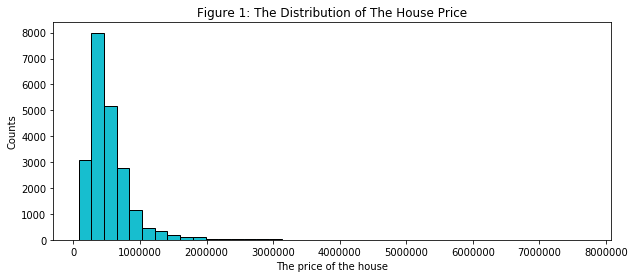

In [7]:
# Plot the histogram of the outcome Y, the price of the house.
p_hist = df_clean.hist(column = "price",
              grid = False,
              figsize = (10, 4), 
              bins = 40,
              orientation = "vertical",
              color = "tab:cyan",
             ec = "black");
plt.title('Figure 1: The Distribution of The House Price')
plt.xlabel('The price of the house')
plt.ylabel('Counts');

Figure 1 shows the distribution of the house price. The house price is the outcome of the analysis. The histogram follows a right-skewed pattern, which validates our analysis of the dataset. And it is a unimodal distribution with a center of 500000 approximately. Moreover, most house prices are located between 0 and 1000000 US dollars. 

In [8]:
# Remove the outlier for the number of bedrooms
# Find the new index and remove the corresponding observation
new_i = 0
for i in range(0, df_clean['bedrooms'].count()):
    if df_clean['index'][i] == 15870:
        new_i = i
new_i
df_clean.drop(new_i, axis = 0, inplace = True)

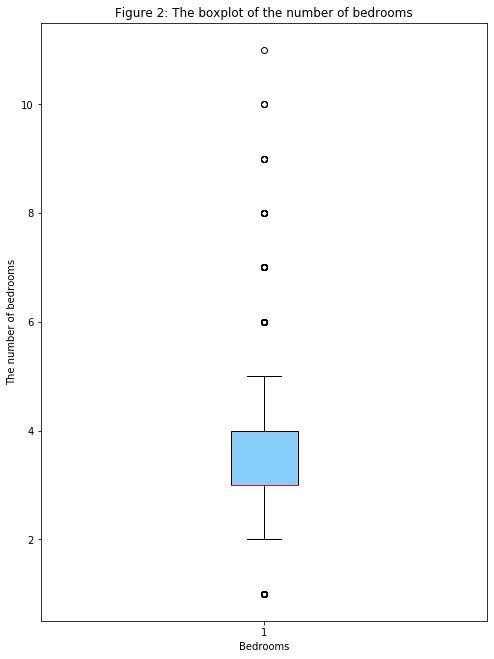

In [9]:
# Plot the histogram of the first X, the number of bedrooms of the house.
plt.figure(figsize=(8, 11))
bed_box = plt.boxplot(df_clean['bedrooms'], patch_artist = True);

plt.title("Figure 2: The boxplot of the number of bedrooms");
plt.xlabel('Bedrooms')
plt.ylabel("The number of bedrooms")
plt.setp(bed_box["boxes"], facecolor="lightskyblue")
plt.setp(bed_box["medians"], color="red")
plt.show();

Figure 2 describes the distribution of the number of bedrooms. The red line is the median(50% quantile) of the number of bedrooms. The distribution follows a right-skewed pattern since the 50% quantile equals the 25% quantile. Moreover, most house owns a number of bedrooms between 3 and 4. Note that the minimum number of bedrooms is 1, and the maximum value has been removed as an outlier.

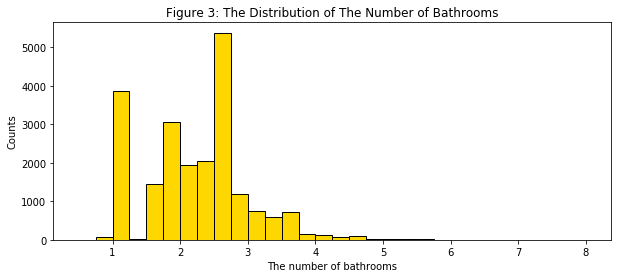

In [10]:
# Plot the histogram of the second X, the number of bathrooms of the house.
bat_hist = df_clean.hist(column='bathrooms',
        grid=False,
        figsize=(10, 4),
        bins=30,
        orientation='vertical',
        color='gold',
        ec = "black");
plt.title("Figure 3: The Distribution of The Number of Bathrooms")
plt.xlabel("The number of bathrooms")
plt.ylabel("Counts");

Figure 3 above shows the distribution of the number of house bathrooms. The histogram is approximately symmetrical with a center of about 2.5. It is a bimodal distribution where the peaks are 1.25 and 2.75 separately. Plus, the most number of bathrooms in the house is under 3.

In [11]:
# Remove the outlier
ind = []
new_i = 0
for i, value in zip(range(0, df_clean['sqft_living'].count()), df_clean['sqft_living']):
    #print(i, value)
    if value > 8000:
        ind.append(i)
ind
df_clean.drop(ind, axis = 0, inplace = True)

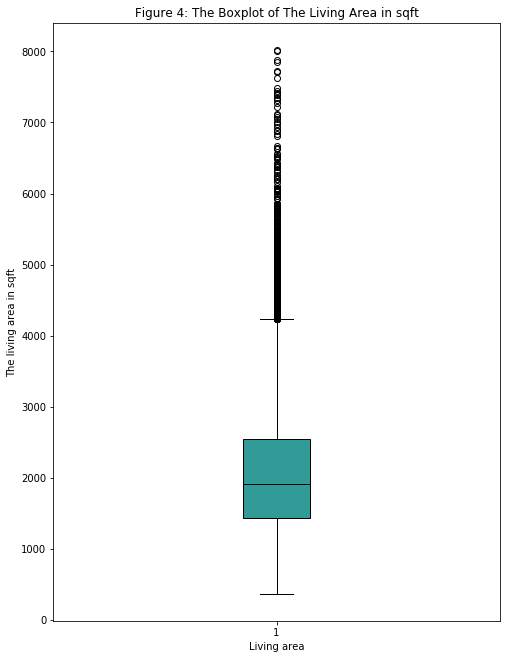

In [12]:
# Plot the boxplot of the third X, the living area of the house.
plt.figure(figsize=(8, 11))
liv_box = plt.boxplot(df_clean['sqft_living'], patch_artist = True);

plt.title("Figure 4: The Boxplot of The Living Area in sqft")
plt.ylabel("The living area in sqft")
plt.xlabel('Living area')
plt.setp(liv_box["boxes"], facecolor="#319C97")
plt.setp(liv_box["medians"], color="black");

The boxplot shows the distribution of the living area of the house. The reason we don't use __1.5*IQR outlier range__ is that the living area of the house is assigned by tier, if we remove those observations above the range, we will miss a lot of information. The living area has a right-skewed pattern, which means the mean value will be larger than the median. And the most living area of houses is between 1400 and 2500 sqft in King County.

<Figure size 576x792 with 0 Axes>

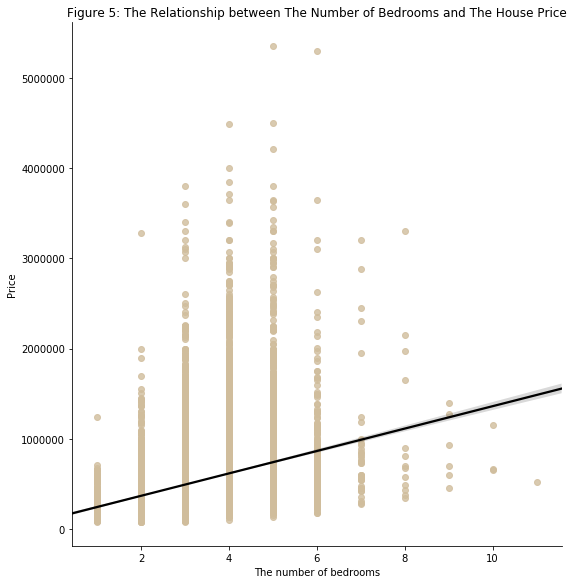

In [13]:
# Plot the relationship between the number of bedrooms and the price of house.
plt.figure(figsize=(8, 11));
rel_x1 = sns.lmplot(x = 'bedrooms',
           y = 'price',
           data = df_clean,
           scatter = True,
           fit_reg = True,
           line_kws = {'color': 'black'},
           scatter_kws = {'color': '#D0BD9C'},
           height = 8);

plt.title('Figure 5: The Relationship between The Number of Bedrooms and The House Price')
plt.xlabel('The number of bedrooms')
plt.ylabel('Price');

Figure 5 is a scatter plot that represents the relationship between the number of bedrooms and the house price in King County. Common sense dictates that the bedroom should be the place in a house where people spend the most time, so it is important to understand the number of bedrooms concerning the price of the house, which can help consumers cost-effectively maximize their utility. The brown dots represent the housing price and their corresponding number of bedrooms. The black line is the regression line that is generated by the dataset. It is easy to observe that there is a moderate positive relationship between house price and the number of bedrooms since the slope of the regression line is not steep. 

<Figure size 576x792 with 0 Axes>

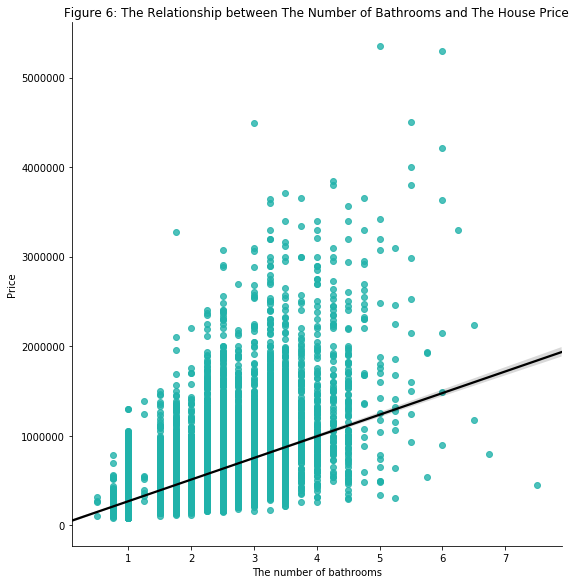

In [14]:
# Plot the relationship between the number of bathrooms and the price of house.
plt.figure(figsize=(8, 11))
rel_x2 = sns.lmplot(x = 'bathrooms',
           y = 'price',
           data = df_clean,
           scatter = True,
           fit_reg = True,
           line_kws = {'color': 'black'},
           scatter_kws = {'color': 'lightseagreen'},
           height = 8);

plt.title('Figure 6: The Relationship between The Number of Bathrooms and The House Price')
plt.xlabel('The number of bathrooms')
plt.ylabel('Price');

Similarly, figure 6 illustrates the relationship between the housing price and the number of bathrooms. Bathrooms are also an essential part of the house, so studying the relationship between the number of bathrooms and the price of the house is also essential to help consumers meet their utility maximization bundle of price and quantity. The green dots represent the price of the house corresponding to the number of bathrooms. What can be observed is that the slope of this regression line is a little steeper than the slope of the line in Figure 5. Therefore, compared with the number of bedrooms, the number of bathrooms has a stronger positive correlation with the housing price.

<Figure size 576x792 with 0 Axes>

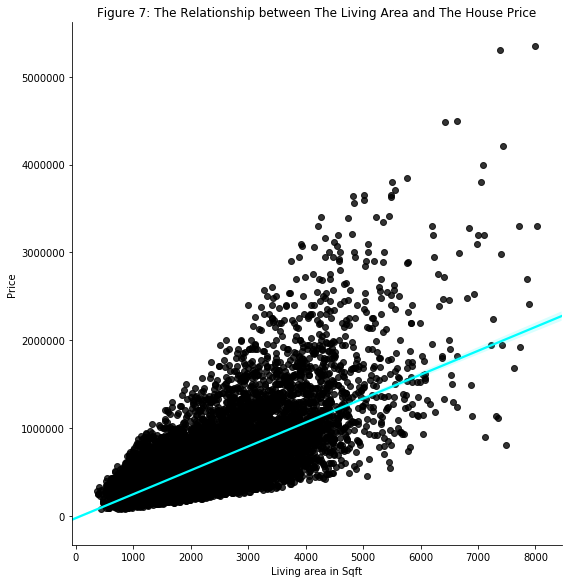

In [15]:
# Plot the relationship between the living area and the price of house.
plt.figure(figsize=(8, 11))
rel_x3 = sns.lmplot(x = 'sqft_living',
           y = 'price',
           data = df_clean,
           scatter = True,
           fit_reg = True,
           line_kws = {'color': 'aqua'},
           scatter_kws = {'color': 'black'},
           height = 8);

plt.title('Figure 7: The Relationship between The Living Area and The House Price')
plt.xlabel('Living area in Sqft')
plt.ylabel('Price');


Lastly, Figure 7 demonstrates how the living area and housing price are related. These two variables are the hypotheses in this piece. This should be the most intuitive relationship, the price of the house will be closely related to the area. From the diagram, the black dot represents the price of the house corresponding to the living area. And the blue regression line tells that there is a strong positive correlation between the living area and the housing price. Furthermore, it is easy to see that this scatterplot has a fan-out pattern. Compared with the previous two independent variables, the correlation of the living area with the price is significantly higher.

## Summary

In conclusion, the dataset that supports the analysis is published by Harlfoxem on the Kaggle website in 2017. The purpose of this analysis is to examine the factors that correlate with the price of the house, so it can help consumers maximize their utilities within their budget constraints. And the analysis hypothesizes that the living area has a strong relationship with the price of the house. 

To answer the research question and to test the hypothesis analyzed in this project. The __scatterplot__ and the __regression line__ are the main methods to explore the research question. I picked the three variables most closely connected to the price of the house according to common sense, the number of bedrooms, the number of bathrooms, and the living area. As a result, the correlation between living area and price is the highest, while the correlation between the number of bedrooms and price is the lowest. This proves that the hypothesis of this analysis is correct.

## Future Steps

Inevitably, this analysis also has its drawbacks. First of all, the dataset was recorded only for the housing information in King County, USA, which led to some randomness in the results of the analysis. And it is unable to predict the factors that affect the housing price in other provinces or countries around the world. Second, since we have not yet learned model selection, we cannot include more variables at this time. 

In the future, I will look for similar data sets from more regions to do my analysis, preferably from regions around the world, which makes my analysis representative and reliable. Moreover, I will include more explanatory variables, and do the model selection to select the variables that affect the housing price the most.

## Bibliography
1. Kaggle.com. 2022. House Sales in King County, USA. [online] Available at: <https://www.kaggle.com/harlfoxem/housesalesprediction> [Accessed 6 February 2022].
2. pagebreak in markdown while creating pdf. (2022). Retrieved 6 February 2022, from https://stackoverflow.com/questions/22601053/pagebreak-in-markdown-while-creating-pdf
3. Seppänen, J. (2022). How do you change the size of figures drawn with Matplotlib?. Retrieved 6 February 2022, from https://stackoverflow.com/questions/332289/how-do-you-change-the-size-of-figures-drawn-with-matplotlib